In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load Data
employee = pd.read_csv('/content/drive/MyDrive/PTDataScience/PandasForDataManipulation/employee_attrition.csv')
employee.head(44)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,NaN,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,NaN,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,NaN,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,4,NaN,79,3,1,Laboratory Technician,4,Single,3068,11864,0,Y,No,13,3,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,3,Female,81,4,1,Laboratory Technician,1,Married,2670,9964,4,Y,Yes,20,4,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,4,NaN,67,3,1,Laboratory Technician,3,Divorced,2693,13335,1,Y,No,22,4,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,4,NaN,44,2,3,Manufacturing Director,3,Single,9526,8787,0,Y,No,21,4,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,3,NaN,94,3,2,Healthcare Representative,3,Married,5237,16577,6,Y,No,13,3,2,80,2,17,3,2,7,7,7,7


In [ ]:
#dropping the duplicates
employee.drop_duplicates

<bound method DataFrame.drop_duplicates of       Age Attrition  ... YearsSinceLastPromotion  YearsWithCurrManager
0      41       Yes  ...                       0                     5
1      49        No  ...                       1                     7
2      37       Yes  ...                       0                     0
3      33        No  ...                       3                     0
4      27        No  ...                       2                     2
...   ...       ...  ...                     ...                   ...
1465   36        No  ...                       0                     3
1466   39        No  ...                       1                     7
1467   27        No  ...                       0                     3
1468   49        No  ...                       0                     8
1469   34        No  ...                       1                     2

[1470 rows x 35 columns]>

In [ ]:
#Exploring the data
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    588 non-null    object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# There are 882 null or missing values in the gender column

In [ ]:
#Looking for all the missing values
# We have 5 missing values 
employee.isnull().sum()

Age                           0
Attrition                     0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                      882
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [ ]:
#Here we can see that a large amount of the null values are in the research and dev department
another1 = employee.loc[employee['Gender'].isnull(),['Department']].value_counts()
another1

Department            
Research & Development    582
Sales                     257
Human Resources            43
dtype: int64

# I noticed that there are no MALE genders in the column and instead they are all Null so lets handle that.

In [ ]:
#Fills in all the missing data with male since there were no males in the gender column
employee.fillna("Male", inplace=True)
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#Lets remove the special char in the travel column

In [ ]:
#Removes the Char _ with a Space. This keeps it looking nice
employee['BusinessTravel'] = employee['BusinessTravel'].str.replace('_', ' ')

In [ ]:
employee.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


#Making the employee number the index

In [ ]:
# With set_index we can set the index and select which column we want to be the index
employee.set_index('EmployeeNumber', inplace=True)

In [ ]:
employee.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel Frequently,279,Research & Development,8,1,Life Sciences,1,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
4,37,Yes,Travel Rarely,1373,Research & Development,2,2,Other,1,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
5,33,No,Travel Frequently,1392,Research & Development,3,4,Life Sciences,1,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
7,27,No,Travel Rarely,591,Research & Development,2,1,Medical,1,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


# Changing the Names to match the dictionary provided

In [ ]:
employee.replace('Non-Travel', 'No Travel', inplace=True)
employee.replace('Research & Development', 'R&D', inplace=True)
employee.replace('Human Resources', 'HR', inplace=True)
employee.replace('Healthcare Representative', 'HC Rep', inplace=True)
employee.replace('Laboratory Technician', 'Lab Technician', inplace=True)
employee.replace('Manufacturing Director', 'Managing Director', inplace=True)
employee.replace('Y', 'yes', inplace=True)
employee.replace('N', 'no', inplace=True)
employee.tail(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2054,29,No,Travel Rarely,468,R&D,28,4,Medical,1,4,Female,73,2,1,Research Scientist,1,Single,3785,8489,1,yes,No,14,3,2,80,0,5,3,1,5,4,0,4
2055,50,Yes,Travel Rarely,410,Sales,28,3,Marketing,1,4,Male,39,2,3,Sales Executive,1,Divorced,10854,16586,4,yes,Yes,13,3,2,80,1,20,3,3,3,2,2,0
2056,39,No,Travel Rarely,722,Sales,24,1,Marketing,1,2,Female,60,2,4,Sales Executive,4,Married,12031,8828,0,yes,No,11,3,1,80,1,21,2,2,20,9,9,6
2057,31,No,No Travel,325,R&D,5,3,Medical,1,2,Male,74,3,2,Managing Director,1,Single,9936,3787,0,yes,No,19,3,2,80,0,10,2,3,9,4,1,7
2060,26,No,Travel Rarely,1167,Sales,5,3,Other,1,4,Female,30,2,1,Sales Representative,3,Single,2966,21378,0,yes,No,18,3,4,80,0,5,2,3,4,2,0,0
2061,36,No,Travel Frequently,884,R&D,23,2,Medical,1,3,Male,41,4,2,Lab Technician,4,Married,2571,12290,4,yes,No,17,3,3,80,1,17,3,3,5,2,0,3
2062,39,No,Travel Rarely,613,R&D,6,1,Medical,1,4,Male,42,2,3,HC Rep,1,Married,9991,21457,4,yes,No,15,3,1,80,1,9,5,3,7,7,1,7
2064,27,No,Travel Rarely,155,R&D,4,3,Life Sciences,1,2,Male,87,4,2,Managing Director,2,Married,6142,5174,1,yes,Yes,20,4,2,80,1,6,0,3,6,2,0,3
2065,49,No,Travel Frequently,1023,Sales,2,3,Medical,1,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,yes,No,14,3,4,80,0,17,3,2,9,6,0,8


# Graphing

#Employee Age vs Hourly Wage
The graph is made by taking the employees ages and their pay rate to compare. The reason I decided on these employees is because I would like to highlight the different job titles and pay ranges. Which I will get more into as I continue graphing.

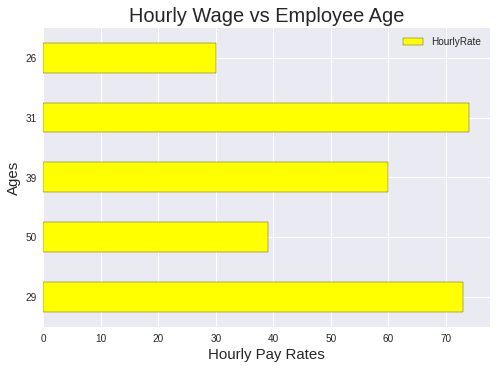

In [ ]:
#using data from the dataframe, this graph will be comparing Age and Hourlyrates
plt.style.use('seaborn')
data = {'Age': [29, 50, 39, 31, 26],
        'HourlyRate': [73,39,60,74,30]}
employee7 = pd.DataFrame(data,columns=['Age','HourlyRate'])
employee7.plot(x ='Age', y='HourlyRate', kind = 'barh', color= 'yellow', edgecolor='black');
plt.title("Hourly Wage vs Employee Age", fontsize=20);
plt.xlabel("Hourly Pay Rates", fontsize=15);
plt.ylabel("Ages", fontsize=15);

#Job Title vs Employee Hourly Wage
Now that I have an Idea of the pay difference, I will use this info to find the difference between distance of work and attrition for these employee's.

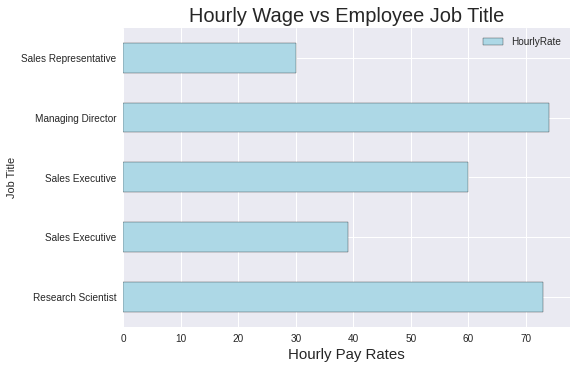

In [ ]:
plt.style.use('seaborn')
data = {'Job Title': ['Research Scientist', 'Sales Executive', 'Sales Executive', 'Managing Director', 'Sales Representative'],
        'HourlyRate': [73,39,60,74,30]}
employee6 = pd.DataFrame(data,columns=['Job Title','HourlyRate'])
employee6.plot(x ='Job Title', y='HourlyRate', kind = 'barh', color= 'lightblue', edgecolor='black');
plt.title("Hourly Wage vs Employee Job Title", fontsize=20);
plt.xlabel("Hourly Pay Rates", fontsize=15);


#Attrition Defined:
Before we continue lets define attrition!

Staff attrition refers to the loss of employees through a natural process, such as retirement, resignation, elimination of a position, personal health, or other similar reasons. With attrition, an employer will not fill the vacancy left by the former employee.

#Attrition Based On Job & Pay
The graph above shows the attrition of the 5 employees. It tell us that out of all 5 employee's we only lost one, the reason being any of the following: maximizing of upward movement, Age, and MaritalStatus. If we take a dive into this employee's information we will see that even at a lower pay rate this employee had the option of OVERTIME. Which in this case earned them a total of 10854$ monthly 

In [ ]:
df_employee = pd.DataFrame({
  "Job Title": ['Research Scientist', 'Sales Executive', 'Sales Executive', 'Managing Director', 'Sales Representative'],
  "HourlyRate": [73,39,60,74,30],
  "Attrition": ['No', 'Yes', 'No', 'No', 'No'],
})

import plotly.express as px

fig = px.bar(df_employee, x="Job Title", y="HourlyRate", color="Attrition", barmode="group", title='Attrition Based on Job & Pay')
fig.show()


#Monthly Pay vs Job Title
With this new visualization we can see that even though he made least money overall, since he had the option for overtime, the amount he made over the time of 3 years, is above most others. But with that said he did work for 20 years before his retirement from us.

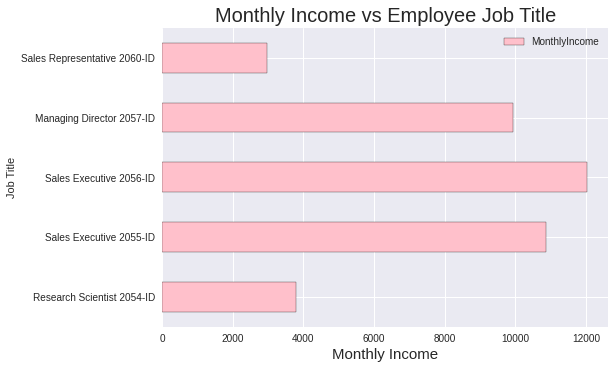

In [ ]:
#This graph shows the Monthly Income Vs the Job Title
plt.style.use('seaborn')
data = {'Job Title': ['Research Scientist 2054-ID', 'Sales Executive 2055-ID', 'Sales Executive 2056-ID', 'Managing Director 2057-ID', 'Sales Representative 2060-ID'],
        'MonthlyIncome': [3785,10854,12031,9936,2966]}
employee3 = pd.DataFrame(data,columns=['Job Title','MonthlyIncome'])
employee3.plot(x ='Job Title', y='MonthlyIncome', kind = 'barh', color= 'pink', edgecolor='black');
plt.title("Monthly Income vs Employee Job Title", fontsize=20);
plt.xlabel("Monthly Income", fontsize=15);


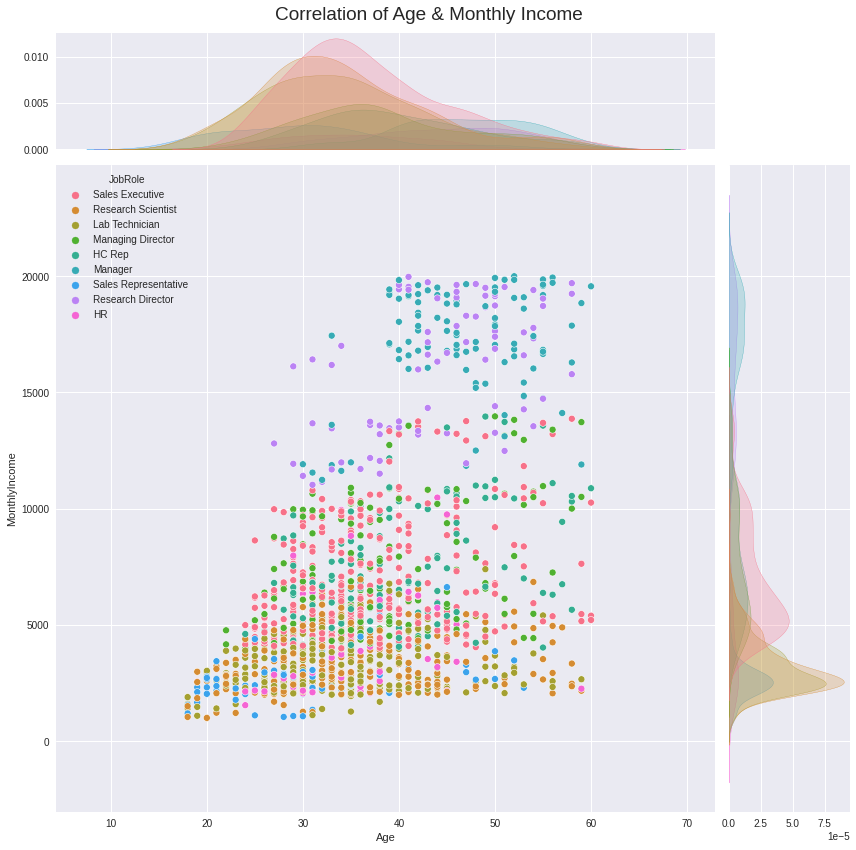

In [ ]:
#Shows the Correlation between Age and Monthly Income
p = sns.jointplot(x='Age', y='MonthlyIncome', data=employee,height= 12, kind='scatter', ratio=5, dropna=True, marginal_ticks=True, hue='JobRole');
p.fig.suptitle("Correlation of Age & Monthly Income", fontsize=19);
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.95)

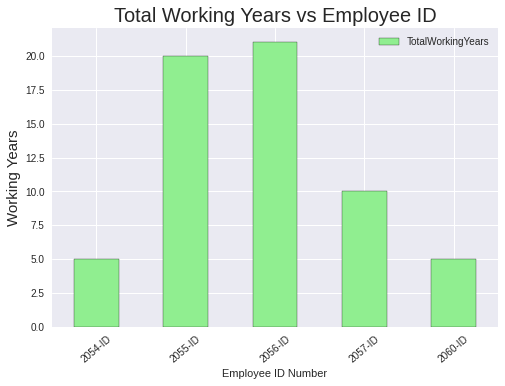

In [ ]:
# This graph shows the working years for each employee ID
plt.style.use('seaborn')
data = {'EmployeeNumber': ['2054-ID', '2055-ID', '2056-ID', '2057-ID', '2060-ID'],
        'TotalWorkingYears': [5, 20, 21, 10, 5]}
employee2 = pd.DataFrame(data,columns=['EmployeeNumber','TotalWorkingYears'])
employee2.plot(x ='EmployeeNumber', y='TotalWorkingYears', kind = 'bar', color= 'lightgreen', edgecolor='black');
plt.title("Total Working Years vs Employee ID", fontsize=20);
plt.xticks(rotation = 40);
plt.xlabel('Employee ID Number')
plt.ylabel("Working Years", fontsize=15);

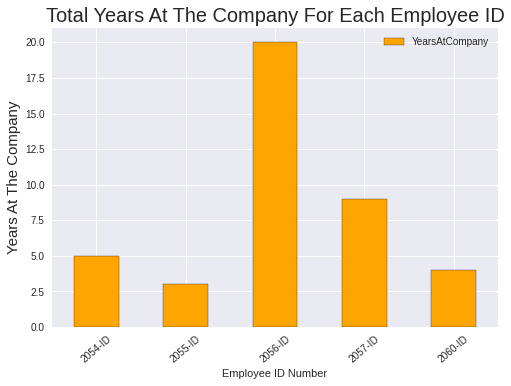

In [ ]:
#This graph shows the working years with us for each employee ID
plt.style.use('seaborn')
data = {'EmployeeNumber': ['2054-ID', '2055-ID', '2056-ID', '2057-ID', '2060-ID'],
        'YearsAtCompany': [5, 3, 20, 9, 4]}
employee1 = pd.DataFrame(data,columns=['EmployeeNumber','YearsAtCompany'])
employee1.plot(x ='EmployeeNumber', y='YearsAtCompany', kind = 'bar', color= 'orange', edgecolor='black');
plt.title("Total Years At The Company For Each Employee ID", fontsize=20);
plt.xticks(rotation = 40);
plt.xlabel('Employee ID Number')
plt.ylabel("Years At The Company", fontsize=15);

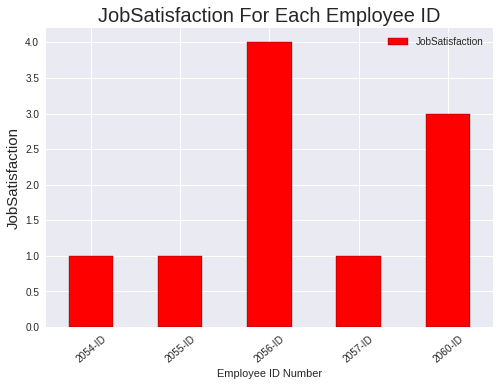

In [ ]:
#This graph shows the Job satisfaction for each Employee ID
plt.style.use('seaborn')
data = {'EmployeeNumber': ['2054-ID', '2055-ID', '2056-ID', '2057-ID', '2060-ID'],
        'JobSatisfaction': [1, 1, 4, 1, 3]}
employee4 = pd.DataFrame(data,columns=['EmployeeNumber','JobSatisfaction'])
employee4.plot(x ='EmployeeNumber', y='JobSatisfaction', kind = 'bar', color= 'red', edgecolor='black');
plt.title("JobSatisfaction For Each Employee ID", fontsize=20);
plt.xticks(rotation = 40);
plt.xlabel('Employee ID Number')
plt.ylabel("JobSatisfaction", fontsize=15);

As we can see from the chart above the overall Job Satisfaction is low for 3 of our employees, which includes the employee that was affected by attrition. Which if we look back at the analysis of the attrition employee, we can assume that he decided to leave because of any of the variables mentioned before but also because of the work enviorment and his mood/mood of the other employee's.

---



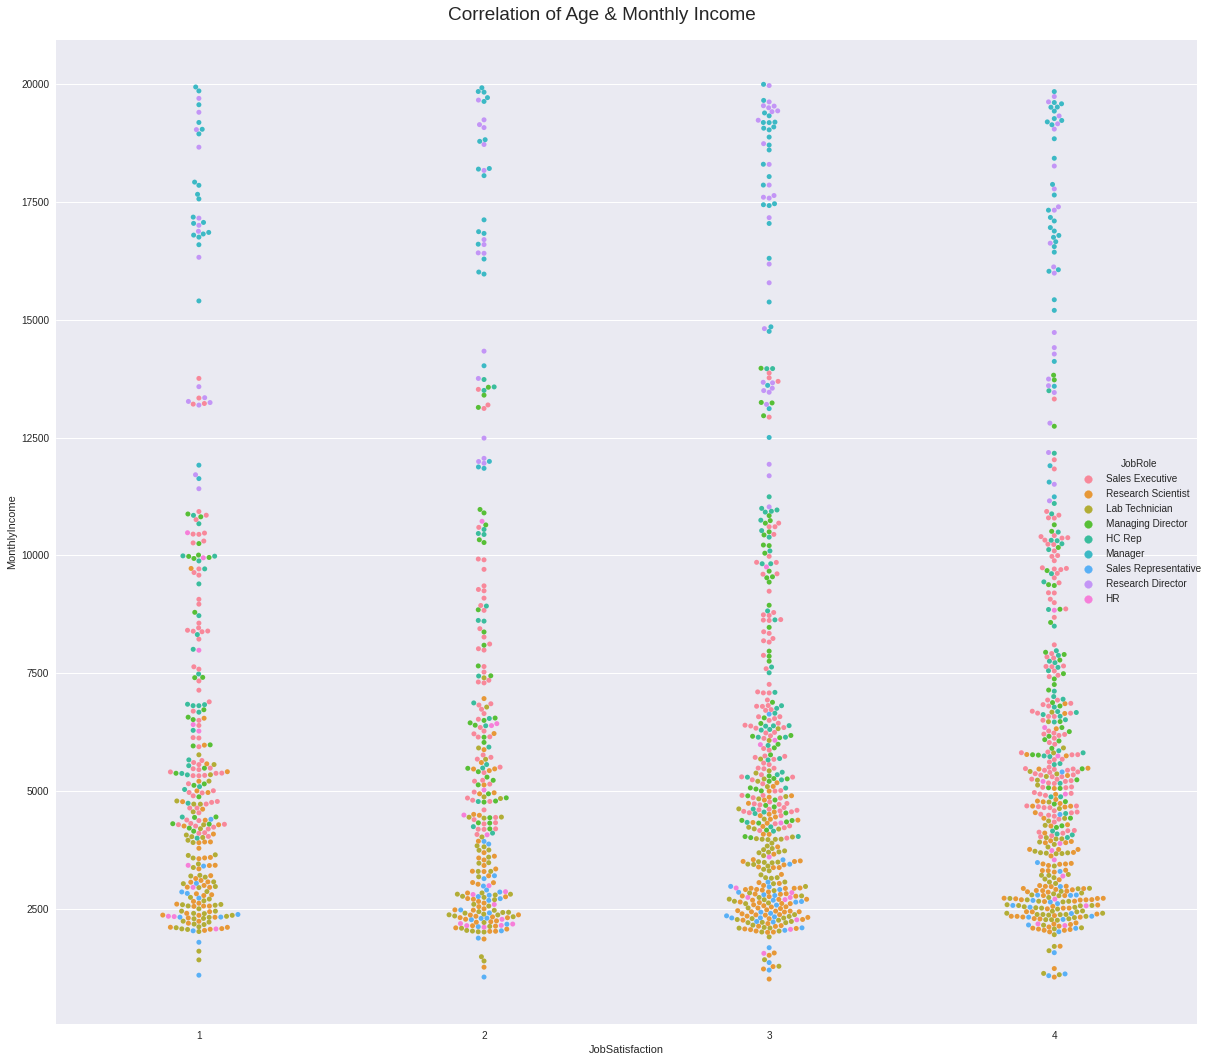

In [ ]:
#Shows the Correlation between Job Satisfaction and Monthly Income
w = sns.catplot(data=employee, kind="swarm", x="JobSatisfaction", y="MonthlyIncome",height= 15, hue="JobRole")
w.fig.suptitle("Correlation of Job Satisfaction & Monthly Income", fontsize=19);
w.fig.tight_layout()
w.fig.subplots_adjust(top=0.95)

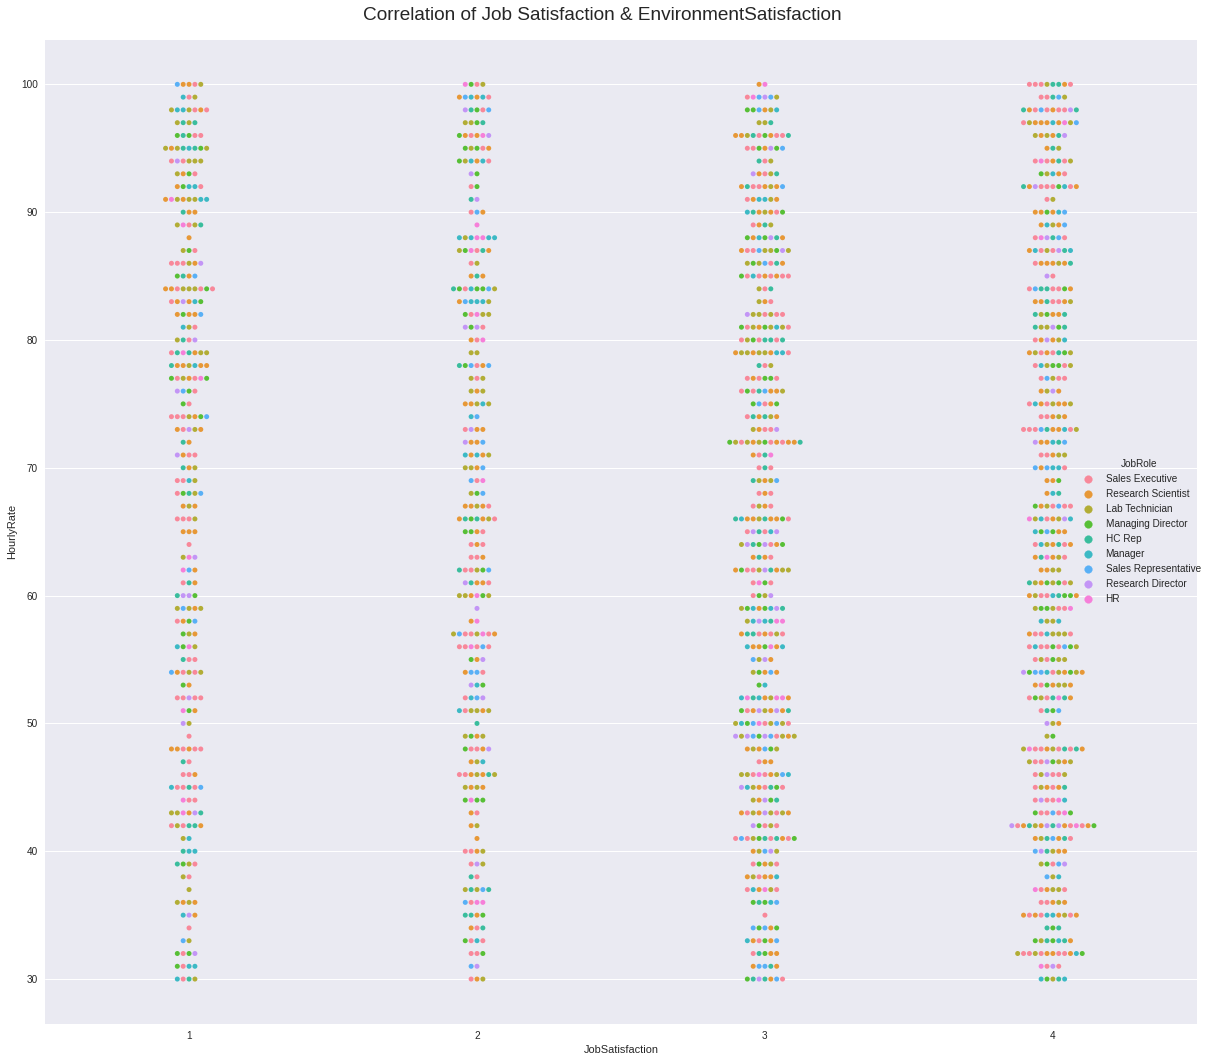

In [ ]:
#Shows the Correlation between Job Satisfaction and HourlyRate
w = sns.catplot(data=employee, kind="swarm", x="JobSatisfaction", y="HourlyRate",height= 15, hue="JobRole")
w.fig.suptitle("Correlation of Job Satisfaction & HourlyRate", fontsize=19);
w.fig.tight_layout()
w.fig.subplots_adjust(top=0.95)

#Conclusion : 
 
 Overall our capacity to keep employee's happy with job roles is not the greatest, and a part of that is the fact of employees not having the a certain level of Job Satisfaction. Which in turn could cause the employee's affected to cause others to feel the same way. Negative thoughts in is negative outputs.

#Recommendations

1. Be Flexible 
2. Embed a Strong, Sociable Culture
3. Drive Communication and Transparency

